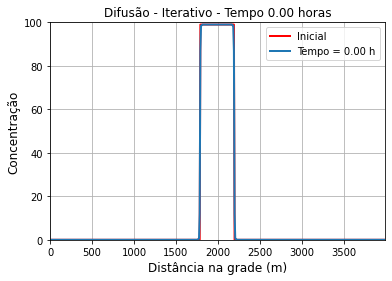

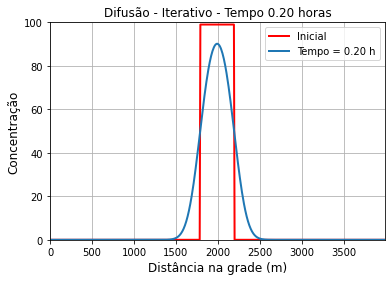

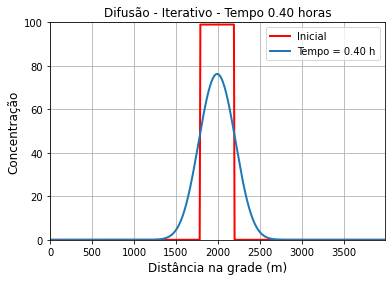

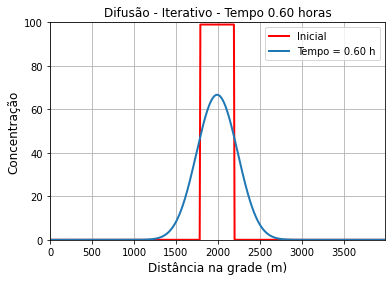

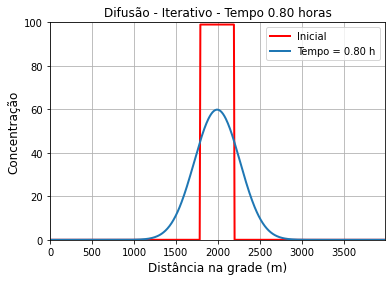

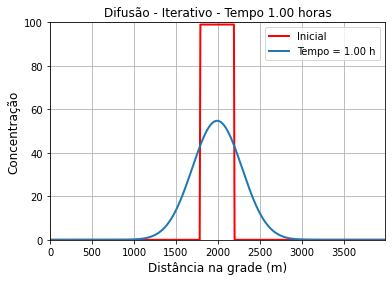

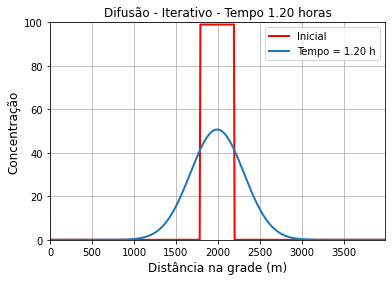

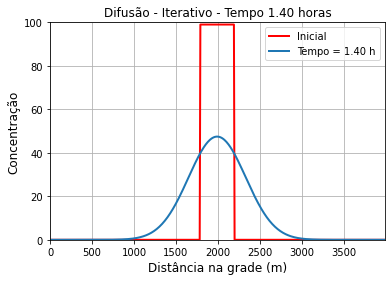

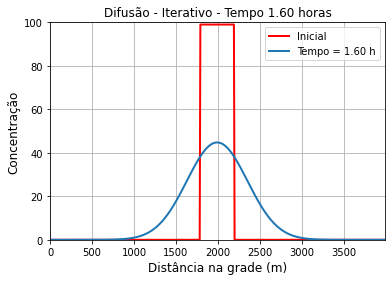

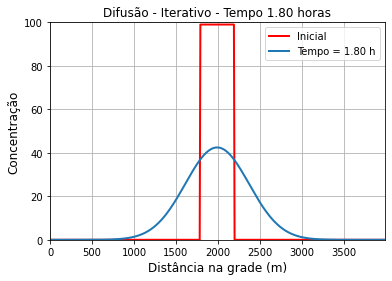

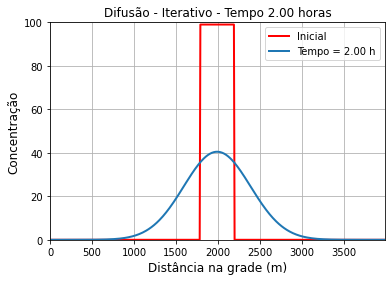

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
jmax = 500  # número de pontos de grade
nmax = 7600  # número de passos de tempo

# Condição inicial
fatu = np.zeros(jmax)
fatu[224:275] = 99  # Sinal retangular (índice adaptado para Python, 0-indexed)
fcin = fatu.copy()

d = 10    # Difusividade em m^2/s
dt = 1    # Intervalo de tempo em s
dx = 8    # Espaçamento da grade em m
q = d * dt / (dx ** 2)  # Parâmetro do esquema explícito
xgrid = np.arange(jmax) * dx

# Esquema explícito: avançado no tempo e centrado no espaço
fren = fatu.copy()
fast = fatu.copy()
fast2 = fatu.copy()
freqplot = 720
kplot = 719

# Loop no tempo
for n in range(1, nmax):
    tempo = n * dt
    kplot += 1
    
    # Esquema iterativo para a difusão
    fast[1:-1] = fatu[1:-1] + q * (fatu[2:] - 2 * fatu[1:-1] + fatu[:-2])
    fast2[1:-1] = fatu[1:-1] + q * (fast[2:] - 2 * fast[1:-1] + fast[:-2])
    fren[1:-1] = fatu[1:-1] + q * (fast2[2:] - 2 * fast2[1:-1] + fast2[:-2])
    
    fren[fren < 0] = 0  # Garantir que valores negativos sejam truncados a zero
    
    # Plotar os resultados a cada freqplot passos de tempo
    if kplot == freqplot:
        kplot = 0
        plt.figure(1)
        plt.plot(xgrid, fcin, 'r', label='Inicial', linewidth=2)
        plt.plot(xgrid, fren, label=f'Tempo = {tempo / 3600:.2f} h', linewidth=2)
        plt.grid(True)
        plt.axis([xgrid[0], xgrid[-1], 0, 100])
        plt.title(f'Difusão - Iterativo - Tempo {tempo / 3600:.2f} horas', fontsize=12)
        plt.xlabel('Distância na grade (m)', fontsize=12)
        plt.ylabel('Concentração', fontsize=12)
        plt.legend()
        plt.show()
        plt.pause(0.5)
    
    # Atualizar variáveis
    fatu = fren.copy()
